# STUDENTS PERFORMANCE IN EXAMS: 
### EXPLORING CORRELATION + PPSCORE PACKAGE REVIEW

This is a Kaggle task inspired notebook: https://www.kaggle.com/spscientist/students-performance-in-exams/tasks?taskId=280

Main objective is to figure out if a correlation exists between the different attributes that are in the dataset.

In [6]:
# Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as ppscore
%matplotlib inline

The source data is a csv dataset containing 1000 records of student scores and their attributes. Fields in detail:
- **Gender**. Categorical variable with two different possible values: female or male.
- **Race/Ethnicity**. Categorical variable with five possible values: group A, B, C, D or E.
- **Parental Level of Education**. Categorical variable with six possible values: bachelor's degree, some college, master's degree, associate's degree, high school or some high school.
- **Lunch**. Categorical variable with two possible values: free/reduced or standard.
- **Test Preparation Course**. Categorical variable with two possible values: completed or none.
- **Math Score**. Numeric variable ranging from 0 to 100.
- **Reading Score**. Numeric variable ranging from 0 to 100.
- **Writing Score**. Numeric variable ranging from 0 to 100.

In [7]:
data=pd.read_csv('./input/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There is no null values in any variable, so by the moment no prior processing will take place.

### INDEX
* 1. [Correlation with Original Data](#first-bullet)
* 2. [Correlation encoding categorical variables](#second-bullet)
    * [2.1 Study by Gender](#second-one-bullet)
* 3. [Bonus: Testing PPSCORE package](#third-bullet)


## 1. Correlation with Original Data <a class="anchor" id="first-bullet"></a>

The score ranges from -1 to 1 and indicates if there is a strong linear relationship — either in a positive or negative direction. 

In [9]:
corr = data.corr()
print(corr)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


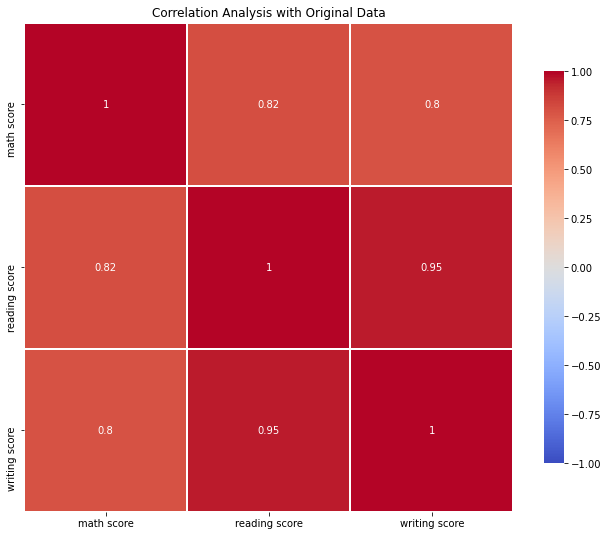

In [10]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation Analysis with Original Data')
# Draw the heatmap with the mask and correct aspect ratio
ca = sns.heatmap(corr, cmap='coolwarm',center=0, vmin = -1,
            square=True, linewidths=1, cbar_kws={"shrink": .8}, annot = True)

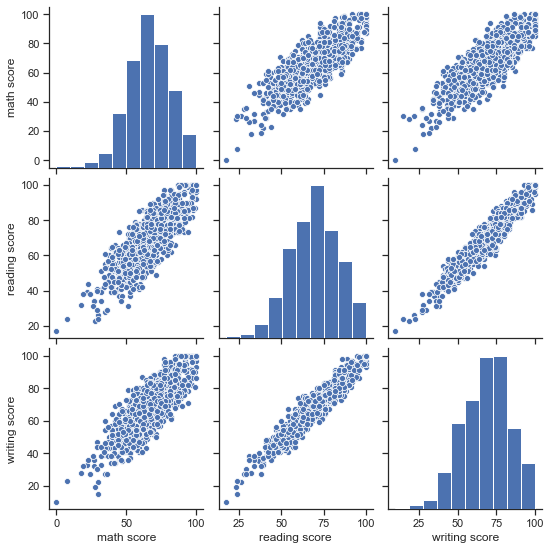

In [11]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

## 2. Correlation encoding categorical variables <a class="anchor" id="second-bullet"></a>

Converting to categorical to plot them

In [12]:
data_label_encoding = data.copy()

In [13]:
data_label_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
data_label_encoding['gender']= data_label_encoding['gender'].astype('category')
data_label_encoding['race/ethnicity']= data_label_encoding['race/ethnicity'].astype('category')
data_label_encoding['parental level of education']= data_label_encoding['parental level of education'].astype('category')
data_label_encoding['lunch']= data_label_encoding['lunch'].astype('category')
data_label_encoding['test preparation course']= data_label_encoding['test preparation course'].astype('category')

In [15]:
data_label_encoding['gender_cat']= data_label_encoding['gender'].cat.codes
data_label_encoding['race/ethnicity_cat']= data_label_encoding['race/ethnicity'].cat.codes
data_label_encoding['parental level of education_cat']= data_label_encoding['parental level of education'].cat.codes
data_label_encoding['lunch_cat']= data_label_encoding['lunch'].cat.codes
data_label_encoding['test preparation course_cat']= data_label_encoding['test preparation course'].cat.codes

In [16]:
data_label_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   gender                           1000 non-null   category
 1   race/ethnicity                   1000 non-null   category
 2   parental level of education      1000 non-null   category
 3   lunch                            1000 non-null   category
 4   test preparation course          1000 non-null   category
 5   math score                       1000 non-null   int64   
 6   reading score                    1000 non-null   int64   
 7   writing score                    1000 non-null   int64   
 8   gender_cat                       1000 non-null   int8    
 9   race/ethnicity_cat               1000 non-null   int8    
 10  parental level of education_cat  1000 non-null   int8    
 11  lunch_cat                        1000 non-null   int8    
 12  test pr

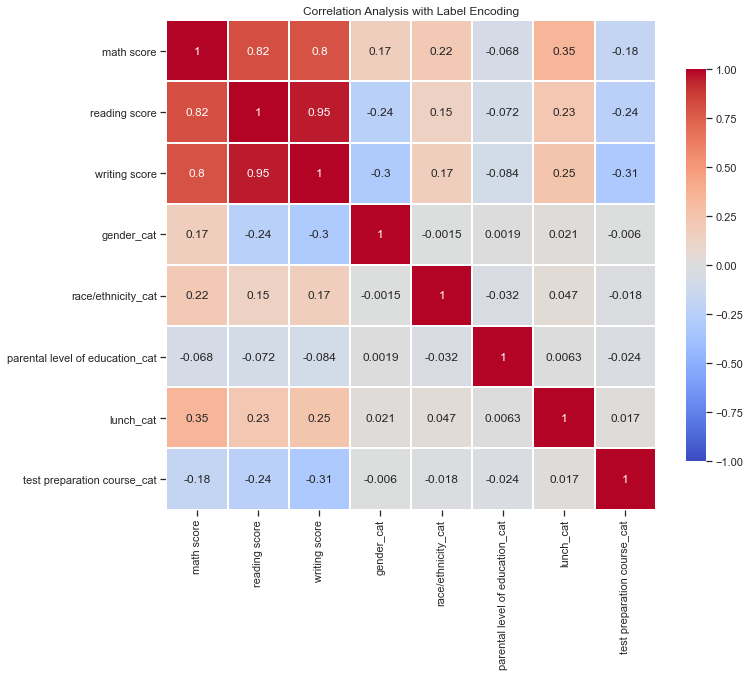

In [17]:
corr_label_encoding = data_label_encoding.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation Analysis with Label Encoding')
# Draw the heatmap with the mask and correct aspect ratio
ca = sns.heatmap(corr_label_encoding, cmap='coolwarm',center=0, vmin = -1,
            square=True, linewidths=1, cbar_kws={"shrink": .8}, annot = True)

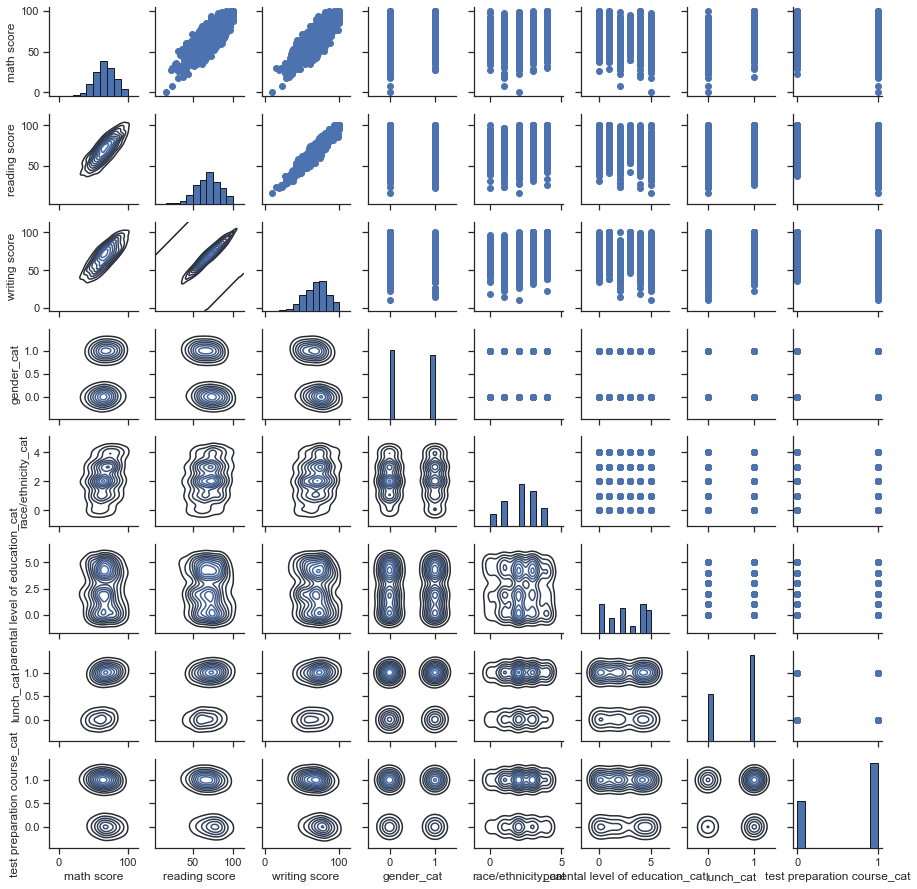

In [18]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= data_label_encoding)

# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter)

# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot)

grid.fig.set_size_inches(12,12)

By looking at 

### 2.1 Study by Gender

In [19]:
dt_tmp = data_label_encoding[['math score', 'reading score', 'writing score', 'gender']]
dt_tmp = dt_tmp.melt(id_vars = ['gender'])

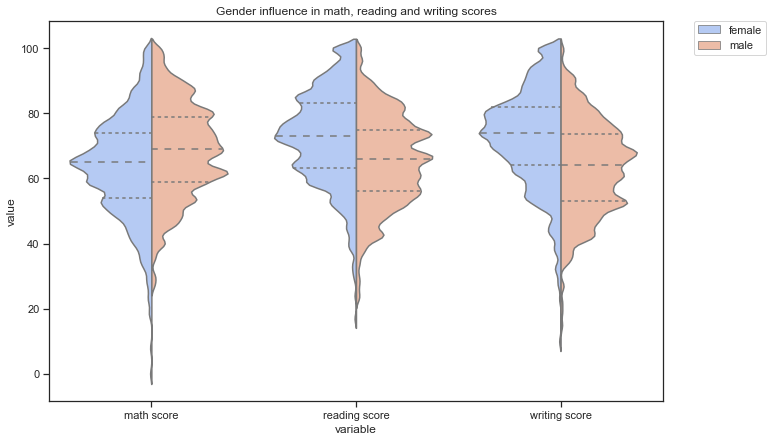

In [20]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 7))
plt.title('Gender influence in math, reading and writing scores')
violin_gender = sns.violinplot(x="variable", y="value", hue="gender",
                     data=dt_tmp, palette="coolwarm", split=True,
                     scale="count", inner="quartile", bw=.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2.2 Study by Test Preparation

In [21]:
dt_tmp = data_label_encoding[['math score', 'reading score', 'writing score', 'test preparation course']]
dt_tmp = dt_tmp.melt(id_vars = ['test preparation course'])

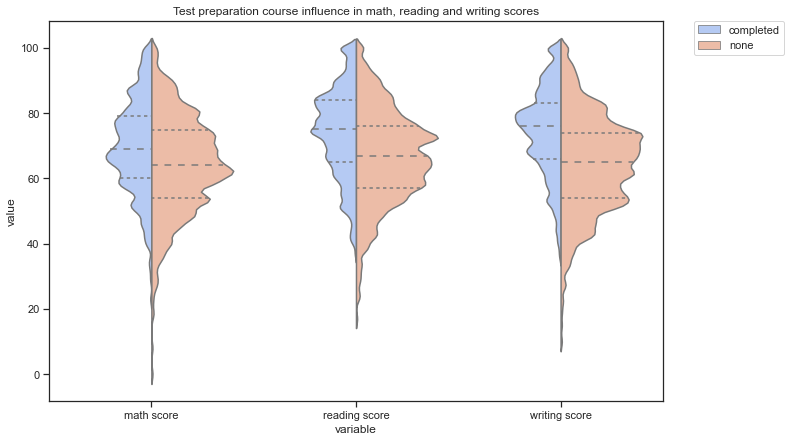

In [22]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 7))
plt.title('Test preparation course influence in math, reading and writing scores')
violin_gender = sns.violinplot(x="variable", y="value", hue="test preparation course",
                     data=dt_tmp, palette="coolwarm", split=True,
                     scale="count", inner="quartile", bw=.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2.3 Study by Race/Ethnicity

In [23]:
dt_tmp = data_label_encoding[['math score', 'reading score', 'writing score', 'race/ethnicity']]
dt_tmp = dt_tmp.melt(id_vars = ['race/ethnicity'])

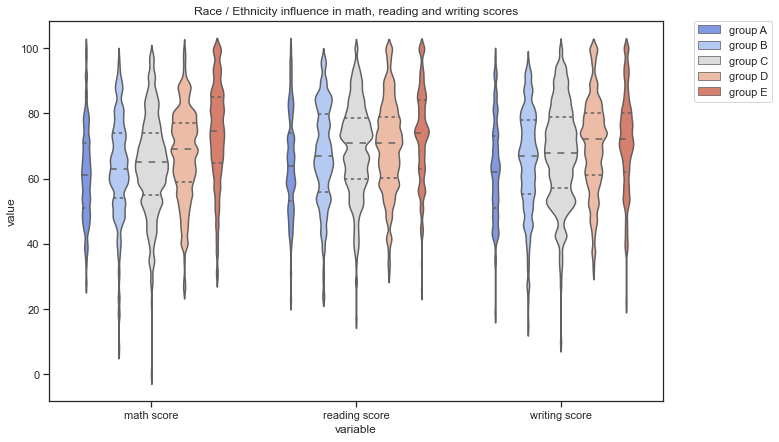

In [24]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 7))
plt.title('Race / Ethnicity influence in math, reading and writing scores')
violin_gender = sns.violinplot(x="variable", y="value", hue="race/ethnicity",
                     data=dt_tmp, palette="coolwarm", 
                     scale="count", inner="quartile", bw=.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2.4 Study by Lunch

In [25]:
dt_tmp = data_label_encoding[['math score', 'reading score', 'writing score', 'lunch']]
dt_tmp = dt_tmp.melt(id_vars = ['lunch'])

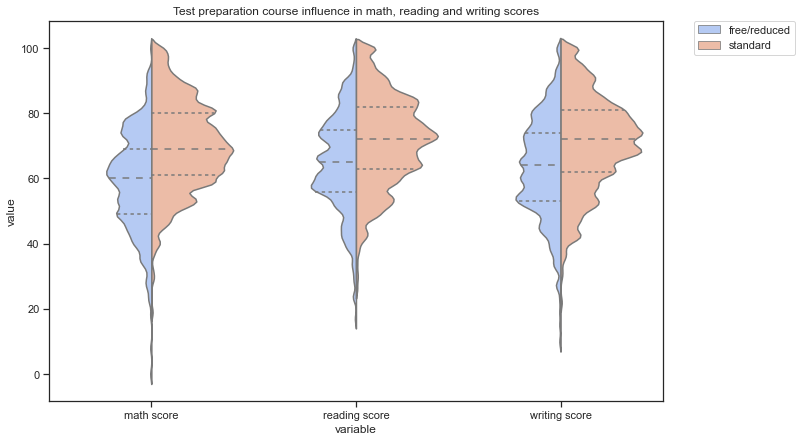

In [26]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 7))
plt.title('Test preparation course influence in math, reading and writing scores')
violin_gender = sns.violinplot(x="variable", y="value", hue="lunch",
                     data=dt_tmp, palette="coolwarm", split=True,
                     scale="count", inner="quartile", bw=.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2.5 By Parental Education

In [27]:
dt_tmp = data_label_encoding[['math score', 'reading score', 'writing score', 'parental level of education']]
dt_tmp = dt_tmp.melt(id_vars = ['parental level of education'])

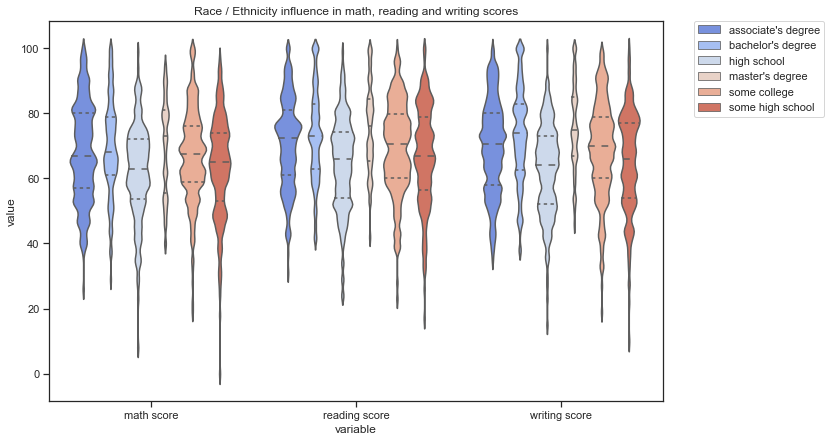

In [28]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 7))
plt.title('Race / Ethnicity influence in math, reading and writing scores')
violin_gender = sns.violinplot(x="variable", y="value", hue="parental level of education",
                     data=dt_tmp, palette="coolwarm", 
                     scale="count", inner="quartile", bw=.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 3. Bonus: Testing PPSCORE package <a class="anchor" id="third-bullet"></a>

In [29]:
# Reorder columns so we have scores in the same order as in section 2 and its easier to compare
data = data[['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']]

In [30]:
ppmatrix = ppscore.matrix(data)

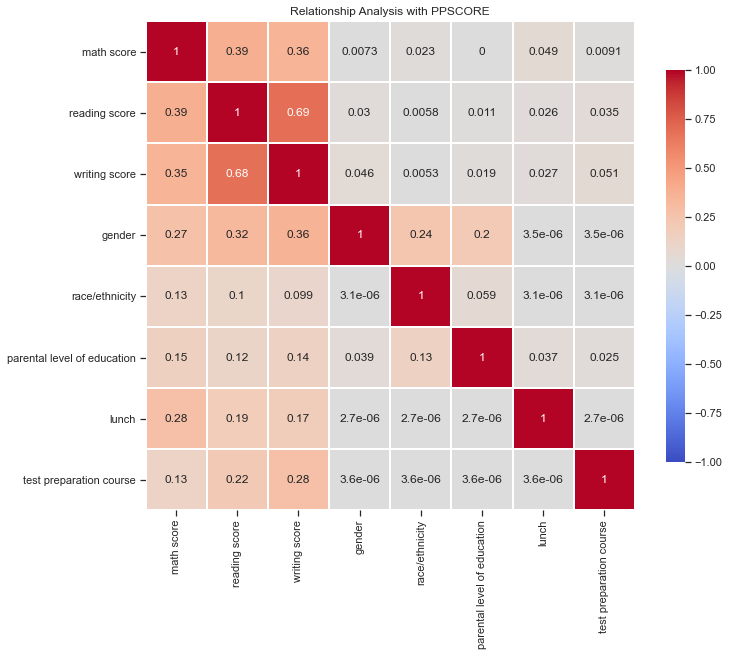

In [31]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Relationship Analysis with PPSCORE')

ra_ppscore = sns.heatmap(ppmatrix, vmin=-1, vmax=1, cmap="coolwarm", linewidths=1, annot=True, 
            square = True, cbar_kws={"shrink": .8})

In [32]:
# Gender, lunch and Test preparation

## 4. Conclusions